# Using deep and stacked autoencoders in combination with convolutional layers

In [8]:
import sys
sys.executable
sys.path.append("C:\Users\George\mlp")

In [25]:
import numpy as np
import logging
import mlp.layers as layers
import mlp.models as models
import mlp.optimisers as optimisers
import mlp.errors as errors
import mlp.learning_rules as learning_rules
import mlp.data_providers as data_providers
import mlp.initialisers as initialisers
from mlp.initialisers import GlorotUniformInit, ConstantInit
from mlp.models import MultipleLayerModel
from mlp.layers import ReluLayer, AffineLayer, SoftmaxLayer,SigmoidLayer,BatchNormLayer,ReshapeLayer, ConvolutionalLayer
from mlp.errors import CrossEntropySoftmaxError,CrossEntropyError,SumOfSquaredDiffsError
from mlp.learning_rules import MomentumLearningRule
from mlp.learning_rules import AdaptiveLearningRule
from mlp.learning_rules import AdaptiveLearningRule2
from mlp.optimisers import Optimiser
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def show_batch_of_images(img_batch, fig_size=(3, 3), num_rows=None):
    fig = plt.figure(figsize=fig_size)
    batch_size, im_height, im_width = img_batch.shape
    if num_rows is None:
        # calculate grid dimensions to give square(ish) grid
        num_rows = int(batch_size**0.5)
    num_cols = int(batch_size * 1. / num_rows)
    if num_rows * num_cols < batch_size:
        num_cols += 1
    # intialise empty array to tile image grid into
    tiled = np.zeros((im_height * num_rows, im_width * num_cols))
    # iterate over images in batch + indexes within batch
    for i, img in enumerate(img_batch):
        # calculate grid row and column indices
        r, c = i % num_rows, i // num_rows
        tiled[r * im_height:(r + 1) * im_height, 
              c * im_height:(c + 1) * im_height] = img
    ax = fig.add_subplot(111)
    ax.imshow(tiled, cmap='Greys', vmin=0., vmax=1.)
    ax.axis('on')
    fig.tight_layout()
    plt.show()
    return fig, ax

# AUTOENCODER 1


In [16]:
# Seed a random number generator
seed = 31102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data_auto = data_providers.MNISTAutoencoderDataProvider('train', batch_size=50, rng=rng) #Initial trainning data for autoencoders


#After all autoencoders have been trained with the above data, we use these data to fprop and train the last affine layer
#train_data  = data_providers.MNISTDataProvider('train', batch_size=50, rng=rng) #Data to train and test the last model
#valid_data = data_providers.MNISTDataProvider('valid', batch_size=50, rng=rng)


In [17]:
input_dim, output_dim, hidden_dim = 784, 784,225

# Use Glorot initialisation scheme for weights and zero biases
weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    AffineLayer(hidden_dim, input_dim, weights_init, biases_init),
])

error = SumOfSquaredDiffsError()
#error = CrossEntropySoftmaxError()


# Use a momentum learning rule - you could use an adaptive learning rule
# implemented for the coursework here instead
learning_rule = learning_rules.AdagradLearningRule(0.01)
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
    model, error, learning_rule, train_data_auto, train_data_auto, data_monitors)

num_epochs = 50
stats_interval = 5

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)



Epoch 0:
  error(train)=1.60e+02, acc(train)=6.80e-04, error(valid)=1.60e+02, acc(valid)=6.80e-04, params_penalty=0.00e+00
Epoch 5: 13.26s to complete
  error(train)=1.71e+00, acc(train)=1.76e-02, error(valid)=1.71e+00, acc(valid)=1.76e-02, params_penalty=0.00e+00
Epoch 10: 11.68s to complete
  error(train)=1.26e+00, acc(train)=1.75e-02, error(valid)=1.26e+00, acc(valid)=1.75e-02, params_penalty=0.00e+00
Epoch 15: 10.82s to complete
  error(train)=1.08e+00, acc(train)=1.85e-02, error(valid)=1.08e+00, acc(valid)=1.85e-02, params_penalty=0.00e+00
Epoch 20: 10.93s to complete
  error(train)=9.86e-01, acc(train)=1.91e-02, error(valid)=9.86e-01, acc(valid)=1.91e-02, params_penalty=0.00e+00
Epoch 25: 10.88s to complete
  error(train)=9.24e-01, acc(train)=1.98e-02, error(valid)=9.24e-01, acc(valid)=1.98e-02, params_penalty=0.00e+00
Epoch 30: 12.30s to complete
  error(train)=8.82e-01, acc(train)=2.00e-02, error(valid)=8.82e-01, acc(valid)=2.00e-02, params_penalty=0.00e+00
Epoch 35: 13.18s to 

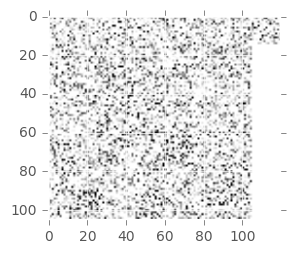

---------------------------------------------------------------


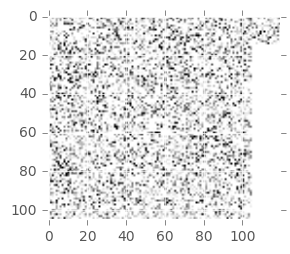

---------------------------------------------------------------


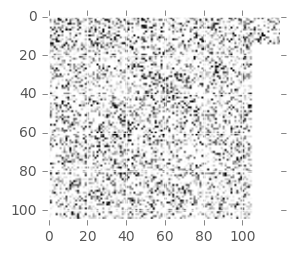

---------------------------------------------------------------


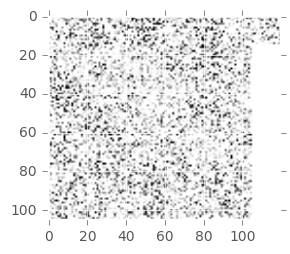

---------------------------------------------------------------


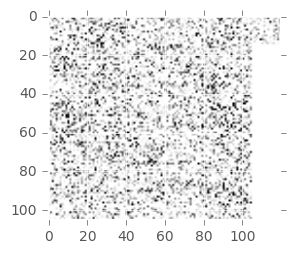

---------------------------------------------------------------


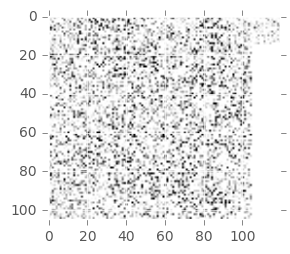

---------------------------------------------------------------


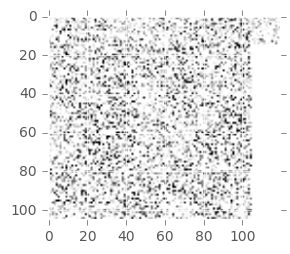

---------------------------------------------------------------


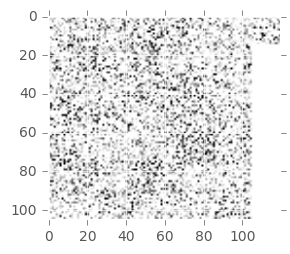

---------------------------------------------------------------


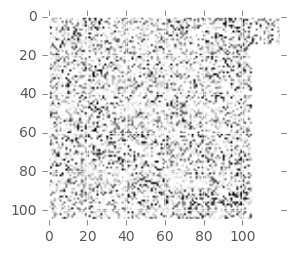

---------------------------------------------------------------


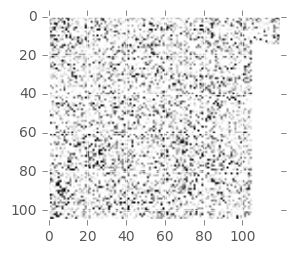

---------------------------------------------------------------


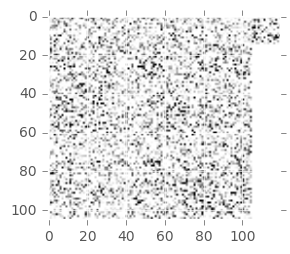

---------------------------------------------------------------


KeyboardInterrupt: 

In [45]:
auton = []
for inputs, target in train_data_auto:
    #reshape inputs from batch of vectors to batch of 2D arrays (images)
    for i in inputs:
        auton.append(model.fprop(i)[1])

    _ = show_batch_of_images(np.array(auton).reshape((50, 15, 15)))
    print "---------------------------------------------------------------"
    auton= []

In [ ]:
print  train_data2.targets[0]
#print train_1tar[0]
valid_1tar = train_data2.targets
print model.fprop(train_data2.inputs)[1].shape
#print valid_1tar[0]

In [ ]:



#train_1dat = data_providers.MNISTDataProvider('train', rng=rng)
#train_1dat.inputs = model.fprop(inputs)[1]
#train_1dat.targets = model.fprop(inputs)[1]
#print train_1dat.inputs.shape

#valid_1dat = data_providers.MNISTDataProvider('valid', rng=rng)
#valid_1dat.inputs = model.fprop(inputs)[1]
#valid_1dat.targets = model.fprop(inputs)[1]


train_data3s = model.fprop(train_data2.inputs)[1]
valid_data3 = model.fprop(valid_data2.inputs)[1]

# AUTOENCODER 2

In [ ]:
train_enc_2 = data_providers.MNISTAutoencoderDataProvider('train', batch_size=50, rng=rng)
train_enc_2.inputs = model.fprop(train_data_auto.inputs)[1]

In [ ]:
print train_enc_2.inputs.shape
print model2.fprop(train_enc_2.inputs)[1].shape


In [ ]:
input_dim, output_dim, hidden_dim = 400, 400, 300

# Use Glorot initialisation scheme for weights and zero biases
weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

# Create three affine layer model with rectified linear non-linearities
model2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    AffineLayer(hidden_dim, input_dim, weights_init, biases_init),
])


error = SumOfSquaredDiffsError()
learning_rule = learning_rules.AdaptiveLearningRule(0.01)


# Monitor classification accuracy during training
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
    model2, error, learning_rule, train_enc_2, train_enc_2, data_monitors)

num_epochs = 50
stats_interval = 5

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

auton = []


# AUTOENCODER 3

In [ ]:
train_enc_3 = data_providers.MNISTAutoencoderDataProvider('train', batch_size=50, rng=rng)
#temp = train_enc_2.inputs
train_enc_3.inputs =  model2.fprop(train_enc_2.inputs)[1]
print train_enc_3.inputs.shape
#train_enc_2.targets = model.fprop(train_data_auto.inputs)[1]

In [ ]:
print train_enc_3.inputs.shape

In [ ]:
input_dim, output_dim, hidden_dim = 300, 300, 200

# Use Glorot initialisation scheme for weights and zero biases
weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

# Create three affine layer model with rectified linear non-linearities
# and dropout layers before every affine layer
model3 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    AffineLayer(hidden_dim, input_dim, weights_init, biases_init),
])

error = SumOfSquaredDiffsError()

learning_rule = learning_rules.AdaptiveLearningRule(0.01)

# Monitor classification accuracy during training
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
    model3, error, learning_rule, train_enc_3, train_enc_3, data_monitors)

num_epochs = 50
stats_interval = 5

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

# TESTING LAYER

In [59]:
plt.style.use('ggplot')

# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data_last = data_providers.MNISTDataProvider('train', rng=rng)
valid_data_last = data_providers.MNISTDataProvider('valid', rng=rng)

rng.seed(seed)

train_data_last.batch_size = 50
valid_data_last.batch_size = 50


In [ ]:
temp1 = model.fprop(train_data_last.inputs)[1]
temp2 = model.fprop(valid_data_last.inputs)[1]

temp3 = model2.fprop(temp1)[1]
temp4 = model2.fprop(temp2)[1]

In [60]:
#train_data_last.inputs = model3.fprop(temp3)[1]        #used with 3 stacked autoencoders
#valid_data_last.inputs = model3.fprop(temp4)[1]

#train_data_last.inputs = model2.fprop(temp1)[1]        #used with 2 stacked autoencoders
#valid_data_last.inputs = model2.fprop(temp2)[1]

#train_data_last.inputs = model.fprop(train_data_last.inputs)[1]  #used with 1 stacked autoencoder
#valid_data_last.inputs = model.fprop(valid_data_last.inputs)[1]

train_data_last.inputs = modeldeep.fprop(train_data_last.inputs)[5]        #used with deep autoencoder
valid_data_last.inputs = modeldeep.fprop(valid_data_last.inputs)[5]

In [57]:
print train_data_last.inputs.shape
print train_data_last.targets.shape

print valid_data_last.inputs.shape
print valid_data_last.targets.shape

print modeldeep.fprop(train_data_last.inputs)[5].shape

(50000L, 784L)
(50000L,)
(10000L, 784L)
(10000L,)
(50000L, 100L)


In [66]:
#input_dim, output_dim, hidden_dim = 784, 784,50
input_dim, output_dim, hidden_dim = 100, 10,100

# Use Glorot initialisation scheme for weights and zero biases
weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

# Create three affine layer model with rectified linear non-linearities
# and dropout layers before every affine layer
"""
modelino = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init),
])
"""

modelino = MultipleLayerModel([
    ReshapeLayer((1,10,10)),
    ConvolutionalLayer(1,1,10,10,2,2), 
    ReshapeLayer(),
    #BatchNormLayer(27*27,27*27),
    AffineLayer(9*9, hidden_dim, weights_init, biases_init),
    #BatchNormLayer(hidden_dim,hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
    #BatchNormLayer(hidden_dim,hidden_dim),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init),


])

# Multiclass classification therefore use cross-entropy + softmax error
#error = CrossEntropySoftmaxError()
# Initialise a cross entropy error object
#error = SumOfSquaredDiffsError()
error = CrossEntropySoftmaxError()
# Use a momentum learning rule - you could use an adaptive learning rule
# implemented for the coursework here instead
learning_rule = learning_rules.AdaptiveLearningRule(0.01)
# Monitor classification accuracy during training
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
    modelino, error, learning_rule, train_data_last, valid_data_last, data_monitors)

num_epochs = 25
stats_interval = 1

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)





Epoch 0:
  error(train)=2.30e+00, acc(train)=1.00e-01, error(valid)=2.30e+00, acc(valid)=1.05e-01, params_penalty=0.00e+00
Epoch 1: 8.17s to complete
  error(train)=4.37e-01, acc(train)=8.67e-01, error(valid)=3.88e-01, acc(valid)=8.89e-01, params_penalty=0.00e+00
Epoch 2: 12.24s to complete
  error(train)=3.58e-01, acc(train)=8.92e-01, error(valid)=3.20e-01, acc(valid)=9.09e-01, params_penalty=0.00e+00
Epoch 3: 13.44s to complete
  error(train)=3.32e-01, acc(train)=9.00e-01, error(valid)=2.99e-01, acc(valid)=9.13e-01, params_penalty=0.00e+00
Epoch 4: 13.28s to complete
  error(train)=3.06e-01, acc(train)=9.07e-01, error(valid)=2.78e-01, acc(valid)=9.19e-01, params_penalty=0.00e+00
Epoch 5: 7.01s to complete
  error(train)=2.94e-01, acc(train)=9.12e-01, error(valid)=2.66e-01, acc(valid)=9.21e-01, params_penalty=0.00e+00
Epoch 6: 8.36s to complete
  error(train)=2.75e-01, acc(train)=9.18e-01, error(valid)=2.50e-01, acc(valid)=9.28e-01, params_penalty=0.00e+00
Epoch 7: 10.44s to complete


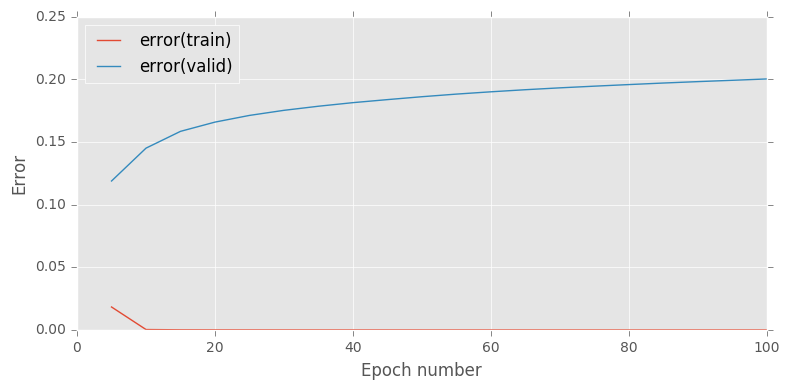

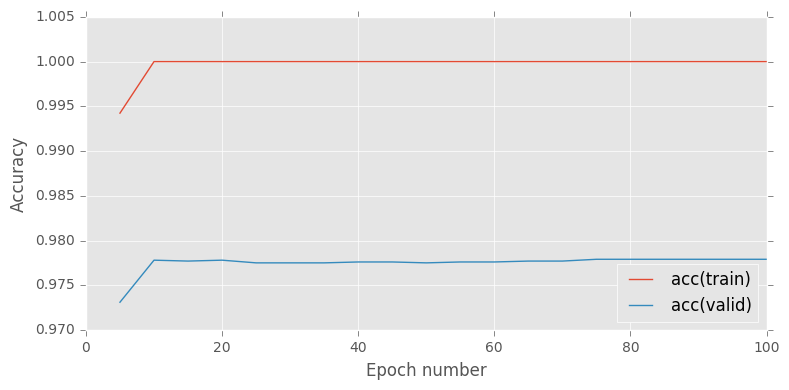

In [31]:
_ = plot_save(
    modelino, error, learning_rule, train_data_last, valid_data_last, num_epochs, stats_interval)

In [30]:
def plot_save(model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    
    fig_1.tight_layout()
    # This minimises whitespace around the axes.
    fig_1.savefig('conv_auto_accu_225.pdf')
    # Save figure to current directory in PDF format
    
    fig_2.tight_layout()
    # This minimises whitespace around the axes.
    fig_2.savefig('conv_auto_accu_225.pdf')

In [ ]:
def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval):

    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_ylabel('Accuracy')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

# Deep Autoencoders


In [47]:
train_data_deep = data_providers.MNISTAutoencoderDataProvider('train', rng=rng)
#valid_data_deep = data_providers.MNISTDataProvider('valid', rng=rng)

train_data_deep.batch_size = 50
#valid_data_last.batch_size = 50

In [48]:
input_dim, output_dim= 784, 784
hidden_dim1,hidden_dim2, hidden_dim3 = 400,200,100

# Use Glorot initialisation scheme for weights and zero biases
weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)

# Create three affine layer model with rectified linear non-linearities
# and dropout layers before every affine layer

modeldeep = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim1, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim1, hidden_dim2, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim2, hidden_dim3, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim3, hidden_dim2, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim2, hidden_dim1, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim1, output_dim, weights_init, biases_init),
    #AffineLayer(hidden_dim, input_dim, weights_init, biases_init),
])

# Multiclass classification therefore use cross-entropy + softmax error
#error = CrossEntropySoftmaxError()
# Initialise a cross entropy error object
error = SumOfSquaredDiffsError()
# Use a momentum learning rule - you could use an adaptive learning rule
# implemented for the coursework here instead
learning_rule = learning_rules.AdaptiveLearningRule(0.01)
# Monitor classification accuracy during training
data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

optimiser = Optimiser(
    modeldeep, error, learning_rule, train_data_deep, train_data_deep, data_monitors)

num_epochs = 50
stats_interval = 1

stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

auton = []
for inputs, target in train_data_deep:
    # reshape inputs from batch of vectors to batch of 2D arrays (images)
    print inputs.shape
    #print inputs[0]
    for i in inputs:
    #print np.array(model.fprop(np.array(inputs[0])))
    #break
        #print len(model.fprop(i[2]))
        auton.append(modeldeep.fprop(i)[4])
    #np.array(model.fprop(np.array(inputs))).shape
    #print np.array(auton).shape
    _ = show_batch_of_images(np.array(auton).reshape((50, 28, 28)))
    _ = show_batch_of_images(inputs.reshape((50, 28, 28)))
    print "---------------------------------------------------------------"
    auton= []

Epoch 0:
  error(train)=9.73e+01, acc(train)=2.48e-03, error(valid)=9.73e+01, acc(valid)=2.48e-03, params_penalty=0.00e+00
Epoch 1: 28.16s to complete
  error(train)=9.51e+00, acc(train)=9.58e-03, error(valid)=9.51e+00, acc(valid)=9.58e-03, params_penalty=0.00e+00
Epoch 2: 31.92s to complete
  error(train)=8.02e+00, acc(train)=1.15e-02, error(valid)=8.02e+00, acc(valid)=1.15e-02, params_penalty=0.00e+00
Epoch 3: 31.64s to complete
  error(train)=7.20e+00, acc(train)=1.19e-02, error(valid)=7.20e+00, acc(valid)=1.19e-02, params_penalty=0.00e+00
Epoch 4: 28.70s to complete
  error(train)=6.82e+00, acc(train)=1.15e-02, error(valid)=6.82e+00, acc(valid)=1.15e-02, params_penalty=0.00e+00
Epoch 5: 30.24s to complete
  error(train)=6.31e+00, acc(train)=1.22e-02, error(valid)=6.31e+00, acc(valid)=1.22e-02, params_penalty=0.00e+00
Epoch 6: 27.49s to complete
  error(train)=6.03e+00, acc(train)=1.16e-02, error(valid)=6.03e+00, acc(valid)=1.16e-02, params_penalty=0.00e+00
Epoch 7: 29.46s to comple

(50L, 784L)


ValueError: total size of new array must be unchanged

In [ ]:
_=plot_save(modeldeep, error, learning_rule, train_data_deep, valid_data_deep, num_epochs, stats_interval)